In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from scipy.stats import zscore
import warnings
warnings.filterwarnings('ignore')

In [2]:
ifd=pd.read_csv('insurance_fraud.csv')
ifd.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [3]:
ifd.shape

(1000, 40)

In [4]:
ifd.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [5]:
ifd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [6]:
ifd.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [7]:
fd=ifd.drop(['_c39'],axis=1)

In [8]:
fd.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,?,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [9]:
fd.isnull().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

N    753
Y    247
Name: fraud_reported, dtype: int64


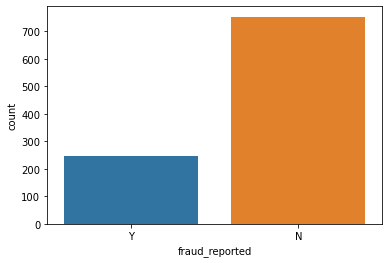

In [10]:
sns.countplot(x='fraud_reported',data=fd)
print(fd['fraud_reported'].value_counts())

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64


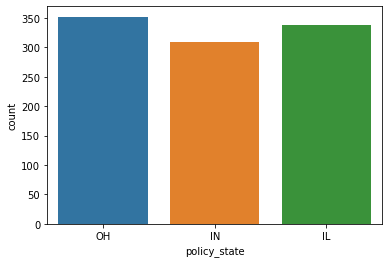

In [11]:
sns.countplot(x='policy_state',data=fd)
print(fd['policy_state'].value_counts())

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64


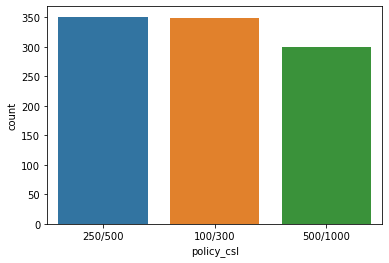

In [12]:
sns.countplot(x='policy_csl',data=fd)
print(fd['policy_csl'].value_counts())

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


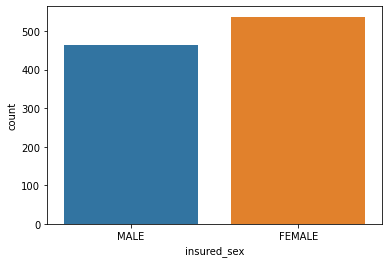

In [13]:
sns.countplot(x='insured_sex',data=fd)
print(fd['insured_sex'].value_counts())

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


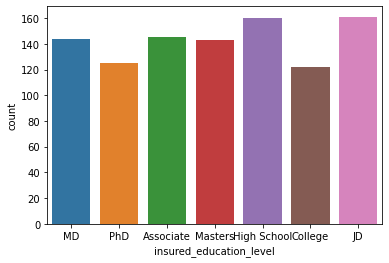

In [14]:
sns.countplot(x='insured_education_level',data=fd)
print(fd['insured_education_level'].value_counts())

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


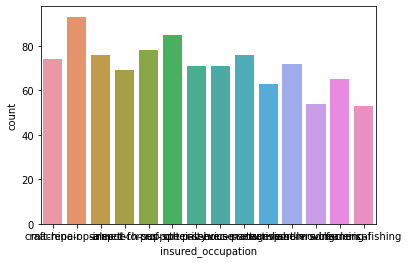

In [15]:
sns.countplot(x='insured_occupation',data=fd)
print(fd['insured_occupation'].value_counts())

reading           64
paintball         57
exercise          57
bungie-jumping    56
movies            55
golf              55
camping           55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


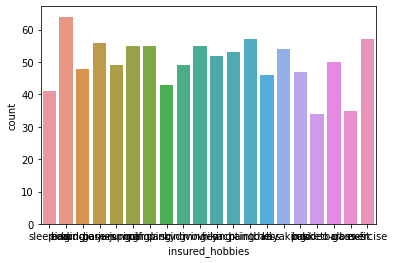

In [16]:
sns.countplot(x='insured_hobbies',data=fd)
print(fd['insured_hobbies'].value_counts())

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


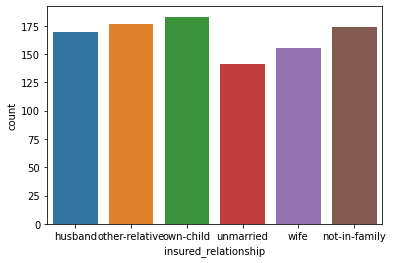

In [17]:
sns.countplot(x='insured_relationship',data=fd)
print(fd['insured_relationship'].value_counts())

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


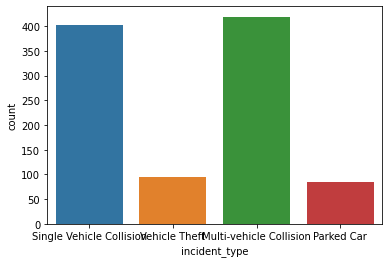

In [18]:
sns.countplot(x='incident_type',data=fd)
print(fd['incident_type'].value_counts())

Rear Collision     292
Side Collision     276
Front Collision    254
?                  178
Name: collision_type, dtype: int64


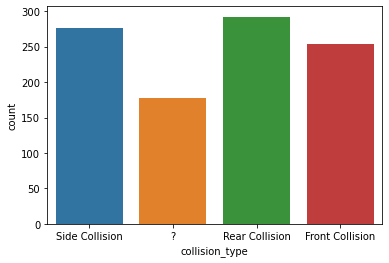

In [19]:
sns.countplot(x='collision_type',data=fd)
print(fd['collision_type'].value_counts())

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


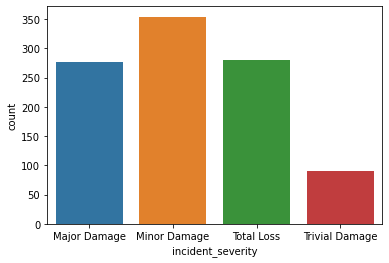

In [20]:
sns.countplot(x='incident_severity',data=fd)
print(fd['incident_severity'].value_counts())

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


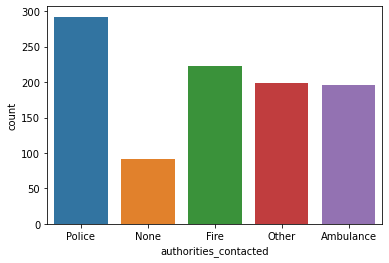

In [21]:
sns.countplot(x='authorities_contacted',data=fd)
print(fd['authorities_contacted'].value_counts())

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


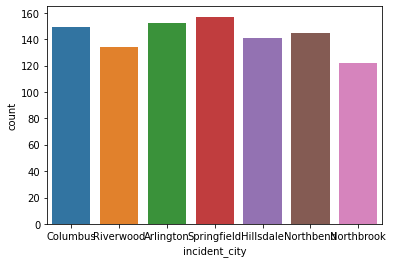

In [22]:
sns.countplot(x='incident_city',data=fd)
print(fd['incident_city'].value_counts())

?      343
NO     343
YES    314
Name: police_report_available, dtype: int64


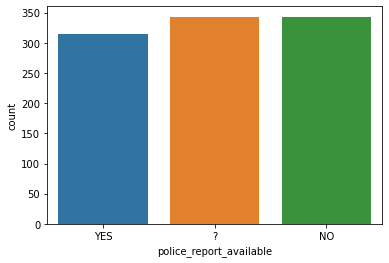

In [23]:
sns.countplot(x='police_report_available',data=fd)
print(fd['police_report_available'].value_counts())

?      360
NO     338
YES    302
Name: property_damage, dtype: int64


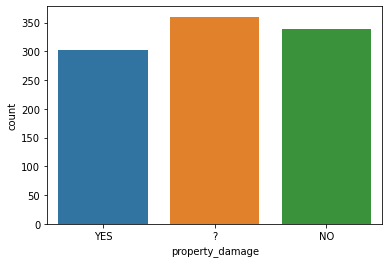

In [24]:
sns.countplot(x='property_damage',data=fd)
print(fd['property_damage'].value_counts())

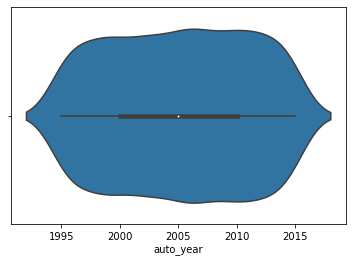

In [25]:
sns.violinplot(x='auto_year',data=fd)

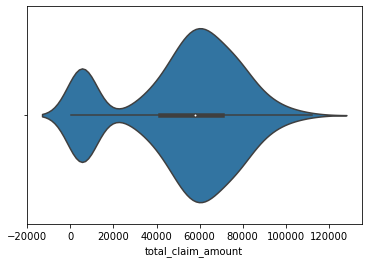

In [26]:
sns.violinplot(x='total_claim_amount',data=fd)

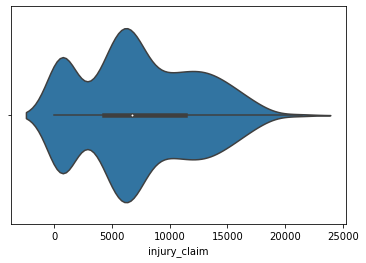

In [27]:
sns.violinplot(x='injury_claim',data=fd)

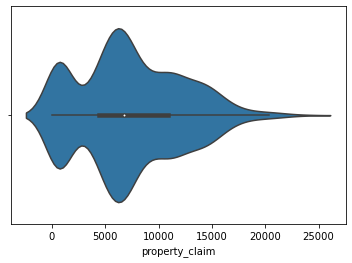

In [28]:
sns.violinplot(x='property_claim',data=fd)

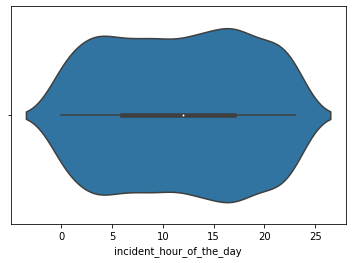

In [29]:
sns.violinplot(x='incident_hour_of_the_day',data=fd)

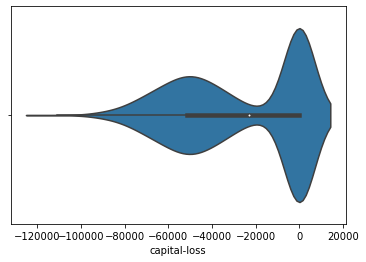

In [30]:
sns.violinplot(x='capital-loss',data=fd)

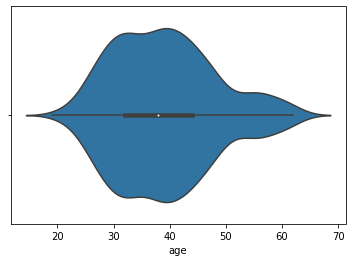

In [31]:
sns.violinplot(x='age',data=fd)

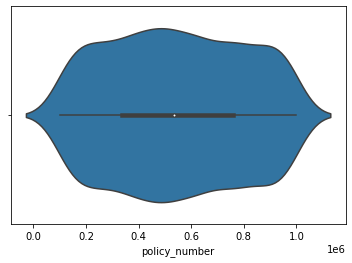

In [32]:
sns.violinplot(x='policy_number',data=fd)

In [33]:
from sklearn.preprocessing import OrdinalEncoder
enc=OrdinalEncoder()
for i in fd.columns:
    if fd[i].dtype=="object":
        fd[i]=enc.fit_transform(fd[i].values.reshape(-1,1))

In [34]:
fd.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,532.0,2.0,1.0,1000,1406.91,0,466132,...,2,2.0,71610,6510,13020,52080,10.0,1.0,2004,1.0
1,228,42,342868,821.0,1.0,1.0,2000,1197.22,5000000,468176,...,0,0.0,5070,780,780,3510,8.0,12.0,2007,1.0
2,134,29,687698,186.0,2.0,0.0,2000,1413.14,5000000,430632,...,3,1.0,34650,7700,3850,23100,4.0,30.0,2007,0.0
3,256,41,227811,766.0,0.0,1.0,2000,1415.74,6000000,608117,...,2,1.0,63400,6340,6340,50720,3.0,34.0,2014,1.0
4,228,44,367455,181.0,0.0,2.0,1000,1583.91,6000000,610706,...,1,1.0,6500,1300,650,4550,0.0,31.0,2009,0.0


In [35]:
fd.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date               float64
policy_state                   float64
policy_csl                     float64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                    float64
insured_education_level        float64
insured_occupation             float64
insured_hobbies                float64
insured_relationship           float64
capital-gains                    int64
capital-loss                     int64
incident_date                  float64
incident_type                  float64
collision_type                 float64
incident_severity              float64
authorities_contacted          float64
incident_state                 float64
incident_city                  float64
incident_location              float64
incident_hour_of_the_day 

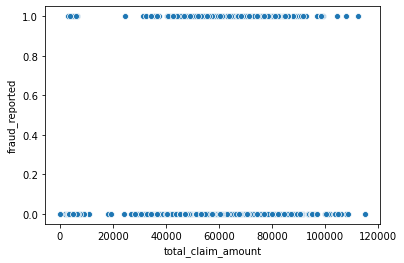

In [36]:
sns.scatterplot(x='total_claim_amount',y='fraud_reported',data=fd)

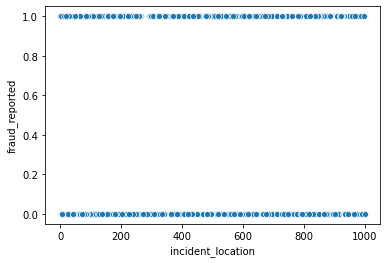

In [37]:
sns.scatterplot(x='incident_location',y='fraud_reported',data=fd)

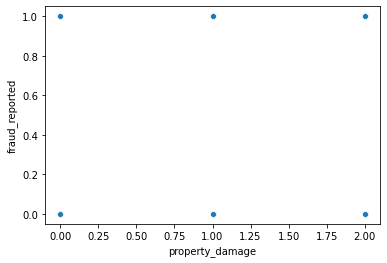

In [38]:
sns.scatterplot(x='property_damage',y='fraud_reported',data=fd)

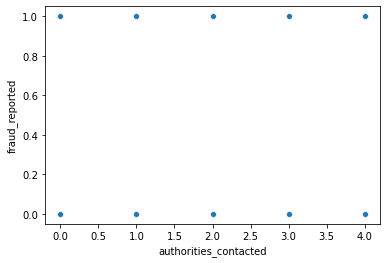

In [39]:
sns.scatterplot(x='authorities_contacted',y='fraud_reported',data=fd)

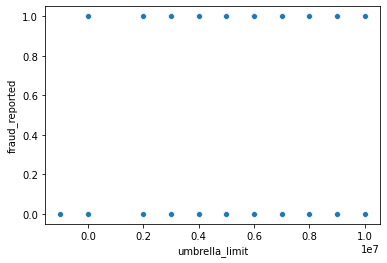

In [40]:
sns.scatterplot(x='umbrella_limit',y='fraud_reported',data=fd)

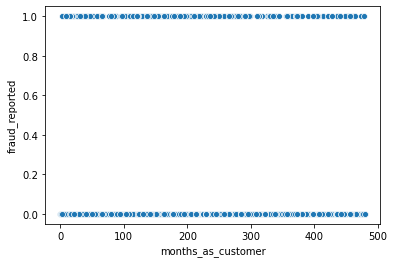

In [41]:
sns.scatterplot(x='months_as_customer',y='fraud_reported',data=fd)

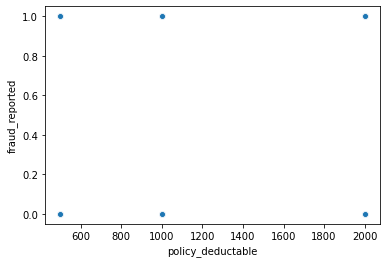

In [42]:
sns.scatterplot(x='policy_deductable',y='fraud_reported',data=fd)

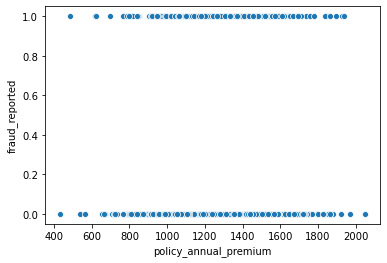

In [43]:
sns.scatterplot(x='policy_annual_premium',y='fraud_reported',data=fd)

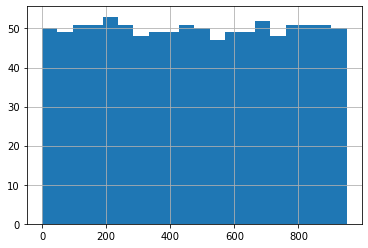

In [44]:
fd.policy_bind_date.hist(bins=20)

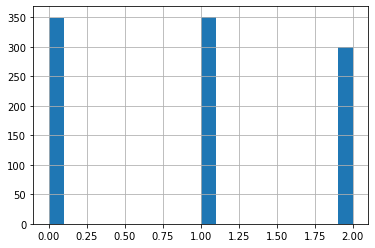

In [45]:
fd.policy_csl.hist(bins=20)

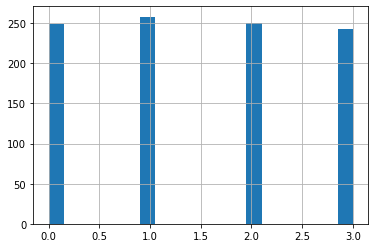

In [46]:
fd.witnesses.hist(bins=20)

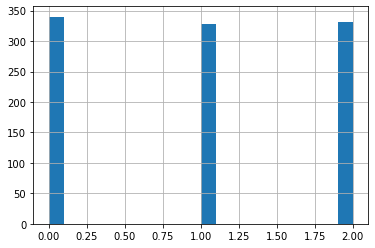

In [47]:
fd.bodily_injuries.hist(bins=20)

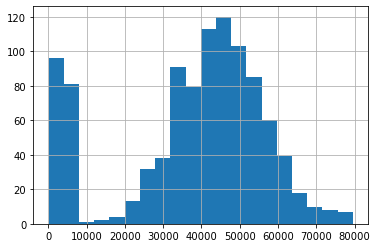

In [48]:
fd.vehicle_claim.hist(bins=20)

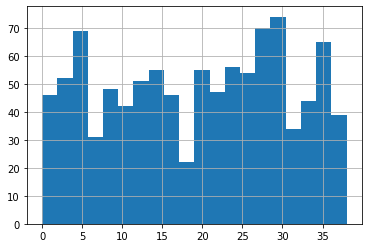

In [49]:
fd.auto_model.hist(bins=20)

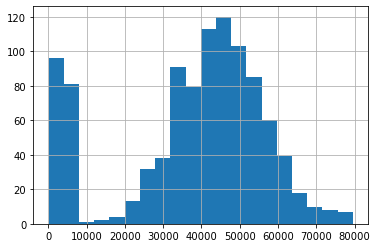

In [50]:
fd.vehicle_claim.hist(bins=20)

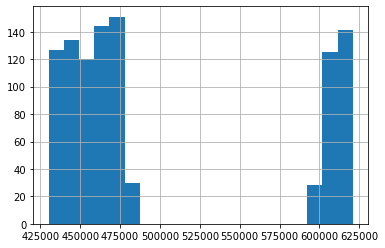

In [51]:
fd.insured_zip.hist(bins=20)

In [52]:
fd.describe()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,...,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,474.332000,1.01400,0.951000,1136.000000,1256.406150,1.101000e+06,501214.488000,...,1.487000,0.971000,52761.94000,7433.420000,7399.570000,37928.950000,6.546000,19.318000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,275.402851,0.83096,0.804516,611.864673,244.167395,2.297407e+06,71701.610941,...,1.111335,0.810442,26401.53319,4880.951853,4824.726179,18886.252893,4.034869,11.136107,6.015861,0.431483
min,0.000000,19.000000,100804.000000,0.000000,0.00000,0.000000,500.000000,433.330000,-1.000000e+06,430104.000000,...,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,0.000000,0.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,233.750000,0.00000,0.000000,500.000000,1089.607500,0.000000e+00,448404.500000,...,1.000000,0.000000,41812.50000,4295.000000,4445.000000,30292.500000,3.000000,10.000000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,472.500000,1.00000,1.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,...,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,7.000000,20.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,713.250000,2.00000,2.000000,2000.000000,1415.695000,0.000000e+00,603251.000000,...,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,10.000000,29.000000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,950.000000,2.00000,2.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,...,3.000000,2.000000,114920.00000,21450.000000,23670.000000,79560.000000,13.000000,38.000000,2015.000000,1.000000


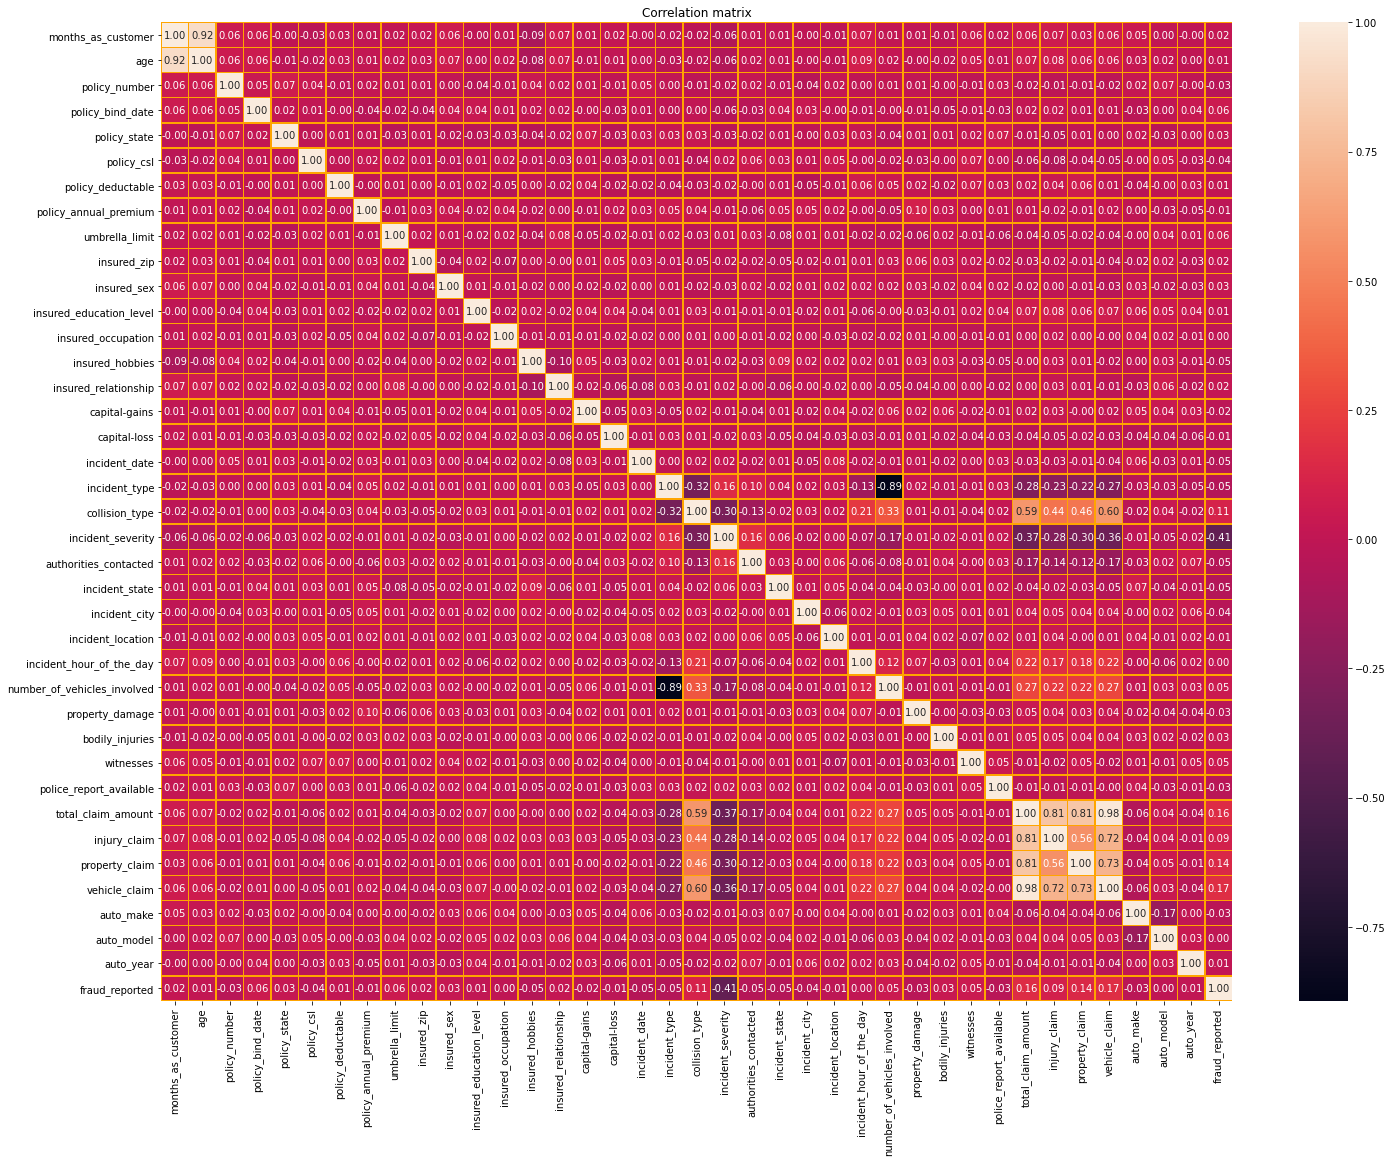

In [53]:
corr=fd.corr()                                               # multivariate analysis
plt.figure(figsize=(24,18))
sns.heatmap(corr,annot=True,linewidths=0.5,linecolor='orange',fmt='.2f',)
plt.title('Correlation matrix')
plt.show()

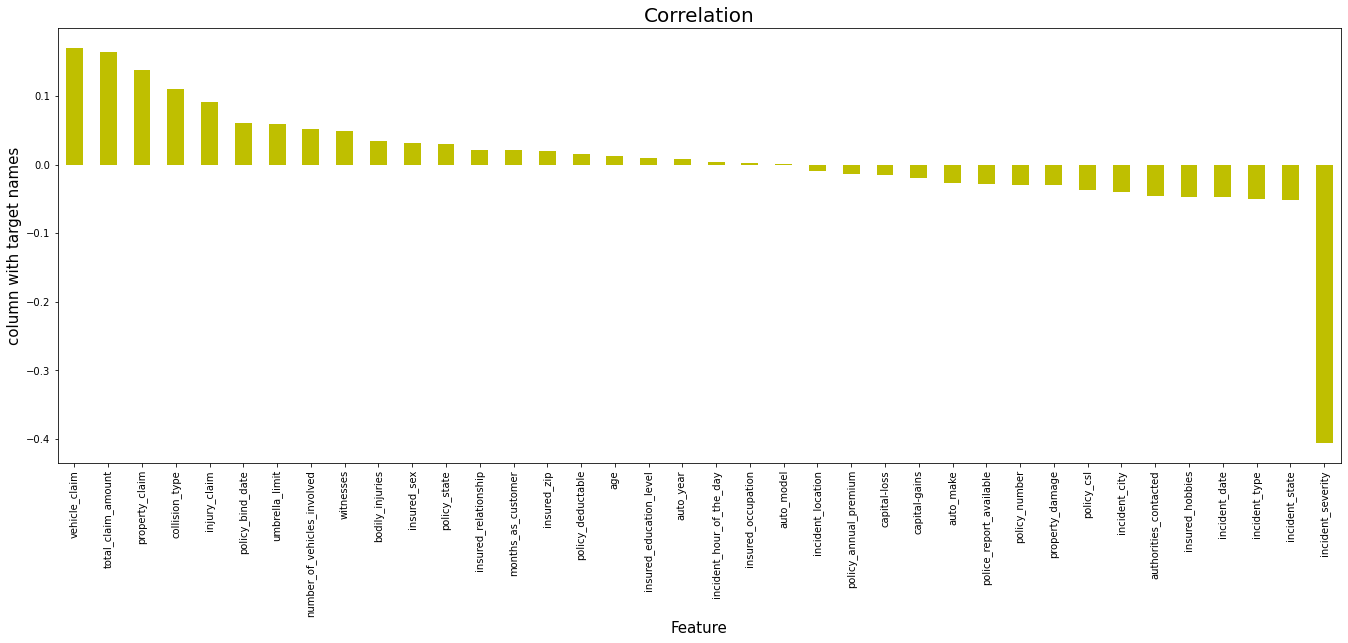

In [54]:
plt.figure(figsize=(23,8))
fd.corr()['fraud_reported'].sort_values(ascending=False).drop(['fraud_reported']).plot(kind='bar',color='y')
plt.xlabel('Feature',fontsize=15)
plt.ylabel('column with target names',fontsize=15)
plt.title("Correlation",fontsize=20)
plt.show()

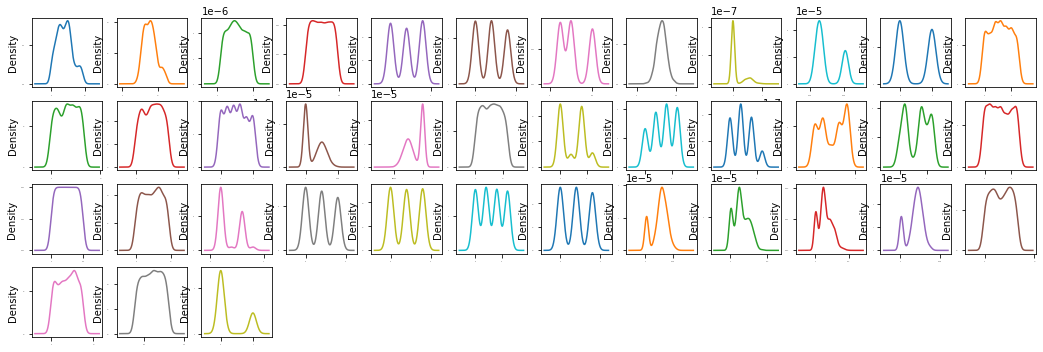

In [55]:
fd.plot(kind='density',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

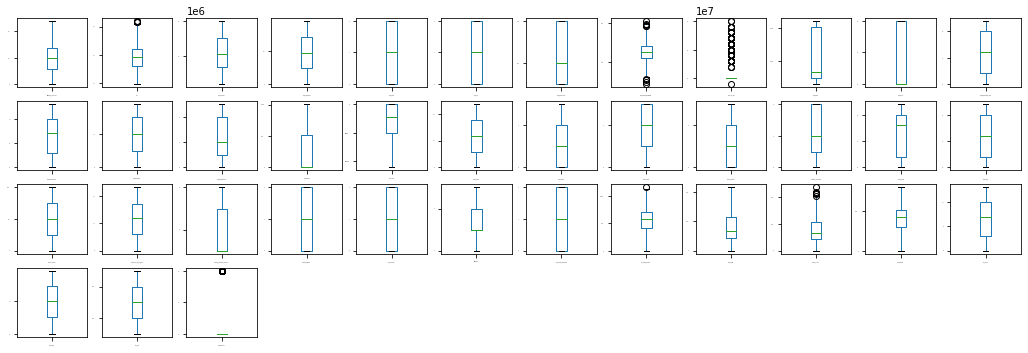

In [56]:
fd.plot(kind='box',subplots=True,layout=(8,12),fontsize=1,figsize=(18,12),sharex=False,legend=False)
plt.show()

In [57]:
fd.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_bind_date               0.005194
policy_state                  -0.026177
policy_csl                     0.088928
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_hobbies               -0.061563
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_date                  0.004756
incident_type                  0.101507
collision_type                -0.193345
incident_severity              0.279016
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000


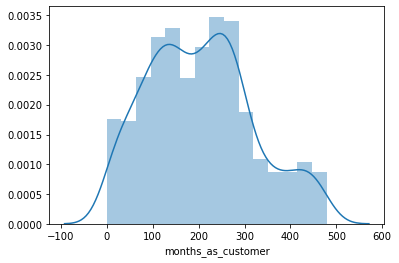

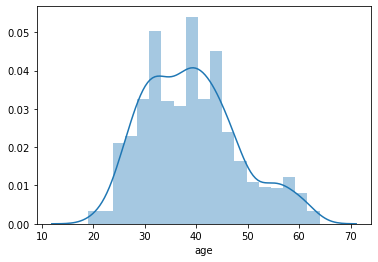

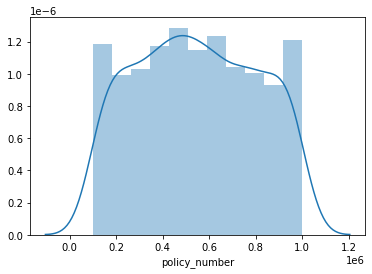

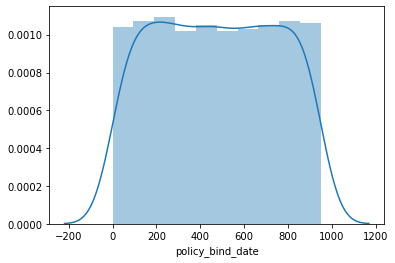

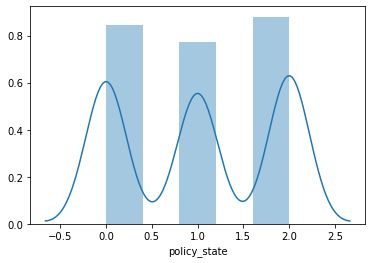

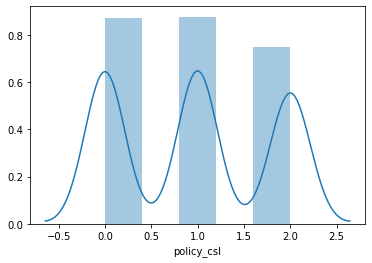

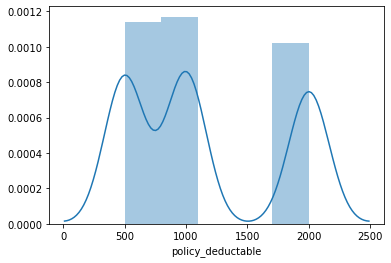

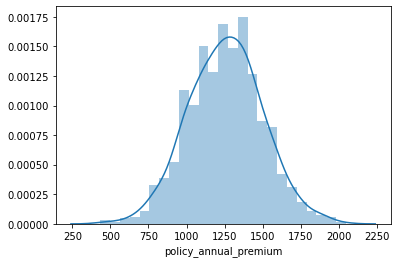

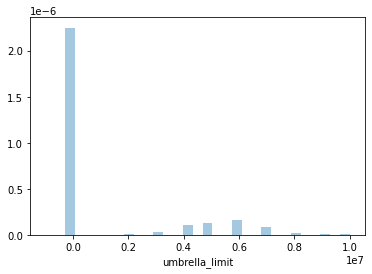

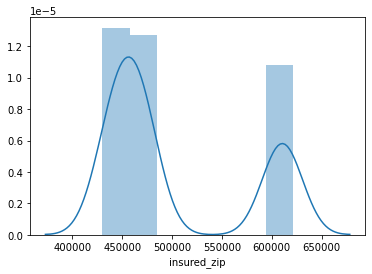

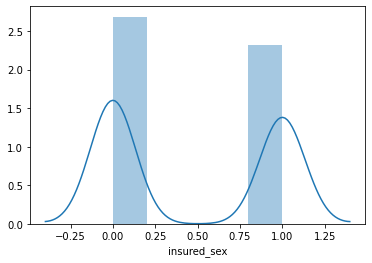

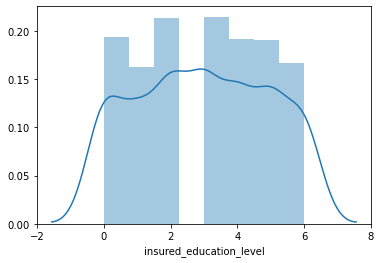

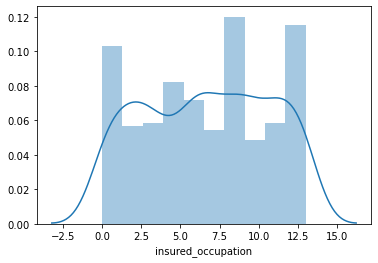

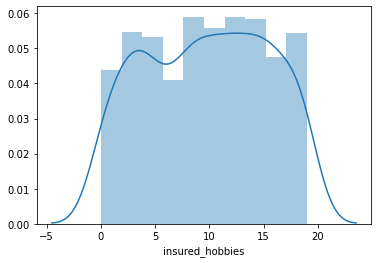

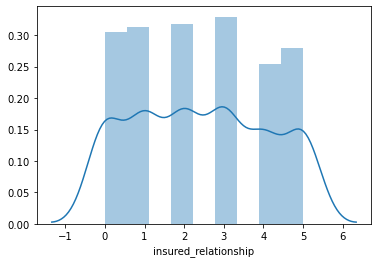

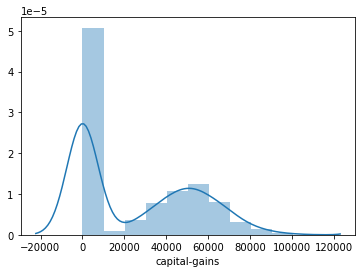

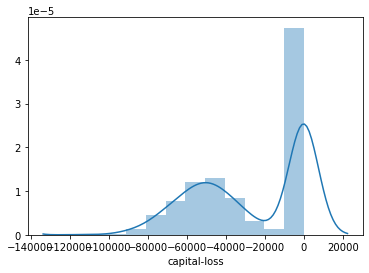

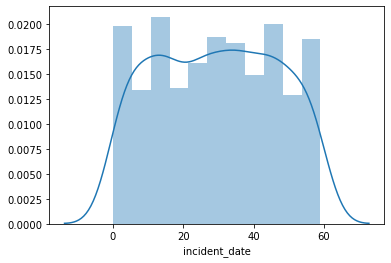

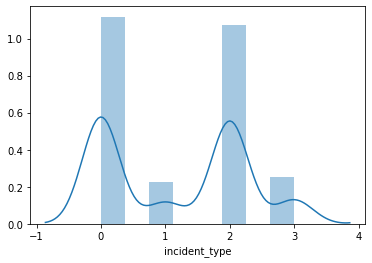

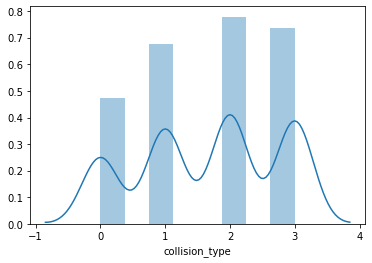

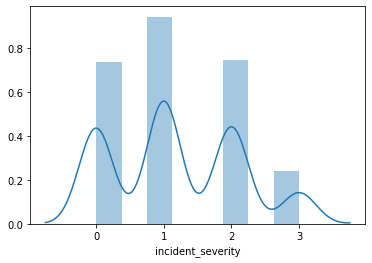

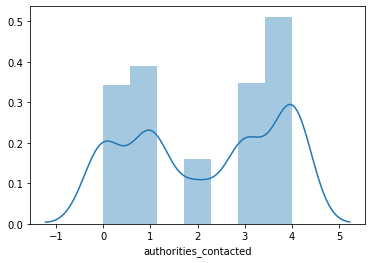

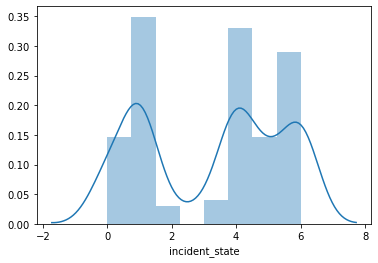

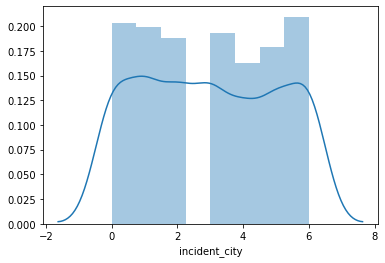

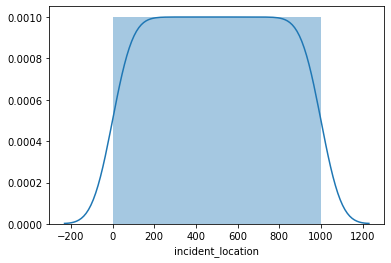

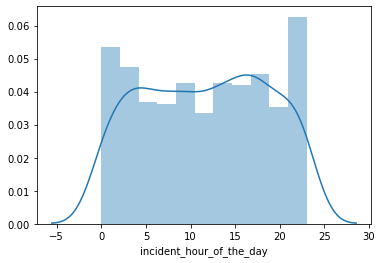

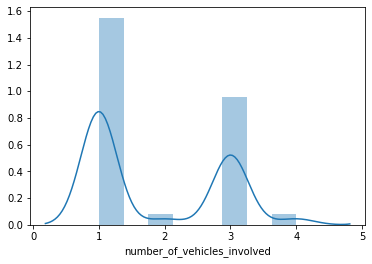

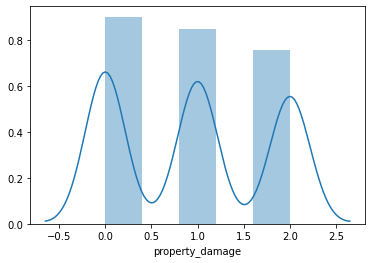

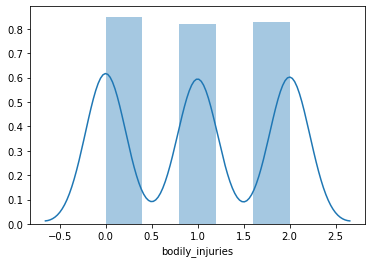

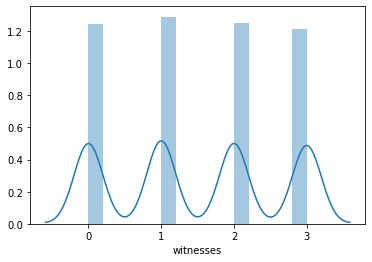

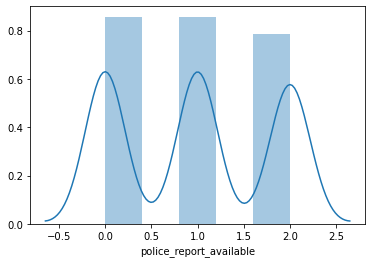

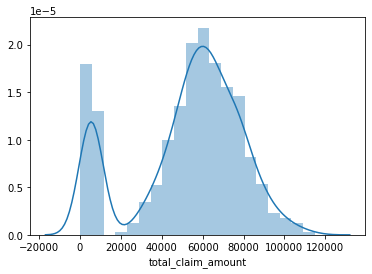

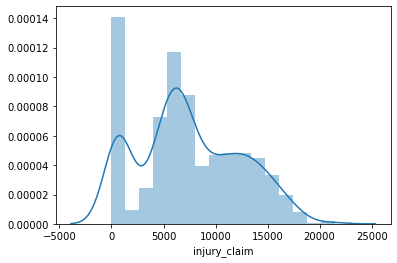

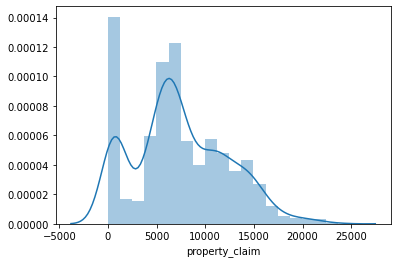

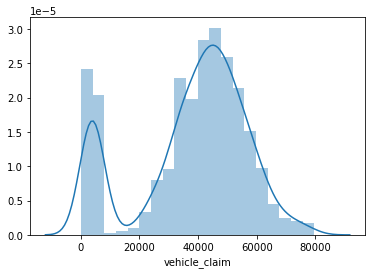

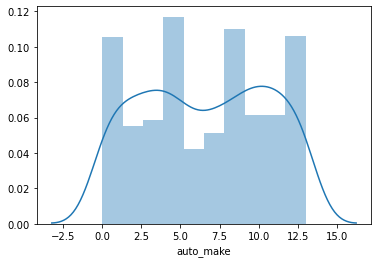

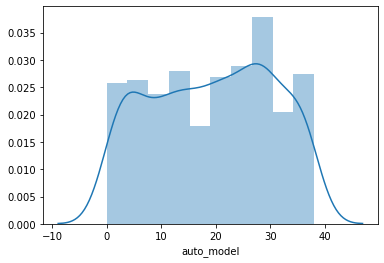

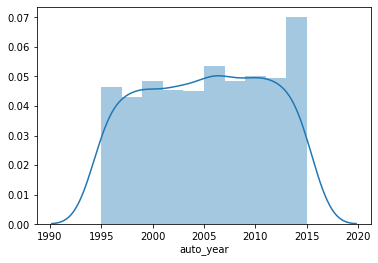

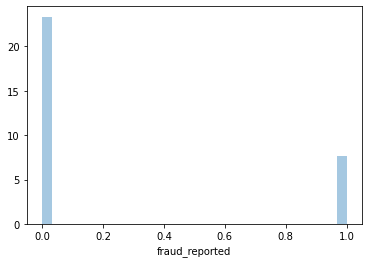

In [58]:
for j in fd.columns:
    plt.figure()
    sns.distplot(fd[j])

In [59]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(fd))
z.shape

(1000, 39)

In [60]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 500, 503,
       657, 700, 763, 807, 875, 922, 975], dtype=int64), array([ 8,  8,  8,  8,  8,  7,  7,  8,  8,  8,  8, 33,  8,  8,  8,  7, 16,
        8,  8,  8], dtype=int64))


In [61]:
fd_new=fd[(z<3).all(axis=1)]
print(fd.shape)
print(fd_new.shape)

(1000, 39)
(980, 39)


In [62]:
loss=((1000-980)/1000)*100
loss

2.0

In [63]:
x=fd.drop(['fraud_reported'],axis=1)
y=fd['fraud_reported']

In [64]:
from sklearn.preprocessing import MinMaxScaler
mm=MinMaxScaler()
x=mm.fit_transform(x)

In [65]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=i)
    lg=LogisticRegression()
    lg.fit(x_train,y_train)
    pred=lg.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAcc:
        maxAcc=acc
        maxRS=i
    print('Best Accuracy is ',maxAcc,'on Random_state ',maxRS)

Best Accuracy is  0.7666666666666667 on Random_state  1
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.7848484848484848 on Random_state  2
Best Accuracy is  0.803030303030303 on Random_st

Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.8090909090909091 on Random_state  97
Best Accuracy is  0.80909090909

In [66]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.23,random_state=97)

In [67]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()
lg.fit(x_train,y_train)
predlg=lg.predict(x_test)
print(accuracy_score(y_test,predlg))
print(confusion_matrix(y_test,predlg))
print(classification_report(y_test,predlg))

0.7869565217391304
[[167   6]
 [ 43  14]]
              precision    recall  f1-score   support

         0.0       0.80      0.97      0.87       173
         1.0       0.70      0.25      0.36        57

    accuracy                           0.79       230
   macro avg       0.75      0.61      0.62       230
weighted avg       0.77      0.79      0.75       230



In [68]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print(accuracy_score(y_test,preddt))
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

0.7913043478260869
[[151  22]
 [ 26  31]]
              precision    recall  f1-score   support

         0.0       0.85      0.87      0.86       173
         1.0       0.58      0.54      0.56        57

    accuracy                           0.79       230
   macro avg       0.72      0.71      0.71       230
weighted avg       0.79      0.79      0.79       230



In [69]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.7478260869565218
[[171   2]
 [ 56   1]]
              precision    recall  f1-score   support

         0.0       0.75      0.99      0.85       173
         1.0       0.33      0.02      0.03        57

    accuracy                           0.75       230
   macro avg       0.54      0.50      0.44       230
weighted avg       0.65      0.75      0.65       230



In [70]:
from sklearn.ensemble import AdaBoostClassifier
ab=AdaBoostClassifier()
ab.fit(x_train,y_train)
predab=ab.predict(x_test)
print(accuracy_score(y_test,predab))
print(confusion_matrix(y_test,predab))
print(classification_report(y_test,predab))

0.808695652173913
[[157  16]
 [ 28  29]]
              precision    recall  f1-score   support

         0.0       0.85      0.91      0.88       173
         1.0       0.64      0.51      0.57        57

    accuracy                           0.81       230
   macro avg       0.75      0.71      0.72       230
weighted avg       0.80      0.81      0.80       230



In [71]:
from sklearn.naive_bayes import GaussianNB
gn=GaussianNB()
gn.fit(x_train,y_train)
predgn=gn.predict(x_test)
print(accuracy_score(y_test,predgn))
print(confusion_matrix(y_test,predgn))
print(classification_report(y_test,predgn))

0.7217391304347827
[[132  41]
 [ 23  34]]
              precision    recall  f1-score   support

         0.0       0.85      0.76      0.80       173
         1.0       0.45      0.60      0.52        57

    accuracy                           0.72       230
   macro avg       0.65      0.68      0.66       230
weighted avg       0.75      0.72      0.73       230



In [72]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()                                                      #by default = 5
knn.fit(x_train,y_train)
predknn=knn.predict(x_test)
print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.7260869565217392
[[160  13]
 [ 50   7]]
              precision    recall  f1-score   support

         0.0       0.76      0.92      0.84       173
         1.0       0.35      0.12      0.18        57

    accuracy                           0.73       230
   macro avg       0.56      0.52      0.51       230
weighted avg       0.66      0.73      0.67       230



In [73]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)
predrfc=rfc.predict(x_test)
print(accuracy_score(y_test,predrfc))
print(confusion_matrix(y_test,predrfc))
print(classification_report(y_test,predrfc))

0.7956521739130434
[[164   9]
 [ 38  19]]
              precision    recall  f1-score   support

         0.0       0.81      0.95      0.87       173
         1.0       0.68      0.33      0.45        57

    accuracy                           0.80       230
   macro avg       0.75      0.64      0.66       230
weighted avg       0.78      0.80      0.77       230



In [74]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(lg,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.767


In [75]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(dt,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7789999999999999


In [76]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(svc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7489999999999999


In [77]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(ab,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7939999999999999


In [78]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(gn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.716


In [79]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(knn,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.7189999999999999


In [80]:
from sklearn.model_selection import cross_val_score
scr= cross_val_score(rfc,x,y,cv=5)
print("cross validation score ",scr.mean())

cross validation score  0.774


minimum difference is accuracy and cross validation score is for SVC() so this is our best model.

In [81]:
from sklearn.model_selection import GridSearchCV
svc=SVC()
params={'kernel':['linear','rbf','poly'],
        'C':[1,10,20]}
gcv= GridSearchCV(svc,params,cv=5)
gcv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 10, 20], 'kernel': ['linear', 'rbf', 'poly']})

In [82]:
print(gcv.best_params_)
print(gcv.best_score_)

{'C': 10, 'kernel': 'linear'}
0.7584415584415585


In [84]:
from sklearn.svm import SVC
svc=SVC(kernel='linear',C=10)
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8260869565217391
[[151  22]
 [ 18  39]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88       173
         1.0       0.64      0.68      0.66        57

    accuracy                           0.83       230
   macro avg       0.77      0.78      0.77       230
weighted avg       0.83      0.83      0.83       230



In [85]:
import joblib
joblib.dump(svc,'insurancefraudmodel.pkl')

['insurancefraudmodel.pkl']